📌 Introduction

In today's digital age, the sheer volume of content available on streaming platforms can overwhelm users 
seeking personalized entertainment. 
Recommendation systems serve as crucial tools in helping users discover content that aligns with their preferences. 
This project focuses on building a Content-Based Movie Recommendation System using the TMDB 5000 Movie Dataset.
By leveraging natural language processing techniques like TF-IDF vectorization and cosine similarity,
the system analyzes movie overviews to recommend similar titles based on content relevance. 
In addition, genre distribution analysis and rating visualizations enhance interpretability, allowing users to 
understand why specific recommendations are made. 
This project not only showcases data preprocessing, feature extraction, and modeling but also highlights
the impact of recommendation systems in enhancing user engagement.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
movies = pd.read_csv('tmdb_5000_movies.csv')
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [4]:
movies[['title', 'overview']].head()

,title,overview
0,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,Spectre,A cryptic message from Bond’s past sends him o...
3,The Dark Knight Rises,Following the death of District Attorney Harve...
4,John Carter,"John Carter is a war-weary, former military ca..."


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


In [7]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [8]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [10]:
movies.duplicated().sum()

0

In [11]:
movies.shape

(4803, 20)

In [12]:
movies.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

In [13]:
# Fill missing overviews with empty string
movies['overview'] = movies['overview'].fillna('')

In [14]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['overview'])

In [15]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [16]:
movies = movies.reset_index()
indices = pd.Series(movies.index, index=movies['title'])

In [17]:
def recommend_movie(title):
    if title not in indices:
        return "Movie not found in dataset."
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Top 5 excluding self
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]
recommend_movie("The Dark Knight")    
    

3                         The Dark Knight Rises
428                              Batman Returns
3854    Batman: The Dark Knight Returns, Part 2
299                              Batman Forever
1359                                     Batman
Name: title, dtype: object

In [29]:
print(movies['genres'].head())

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object


In [30]:
print(all_genres[:10])  # To check the first few genres

[]


In [32]:
# Extract Genres
def parse_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        return [g['name'] for g in genres]
    except:
        return []

movies['genres_list'] = movies['genres'].apply(parse_genres)

# Flatten all genres into one list
all_genres = sum(movies['genres_list'], [])

C:\Users\shiva\AppData\Local\Temp\ipykernel_7940\1213588540.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_genres, order=pd.Series(all_genres).value_counts().index, palette='Set2')


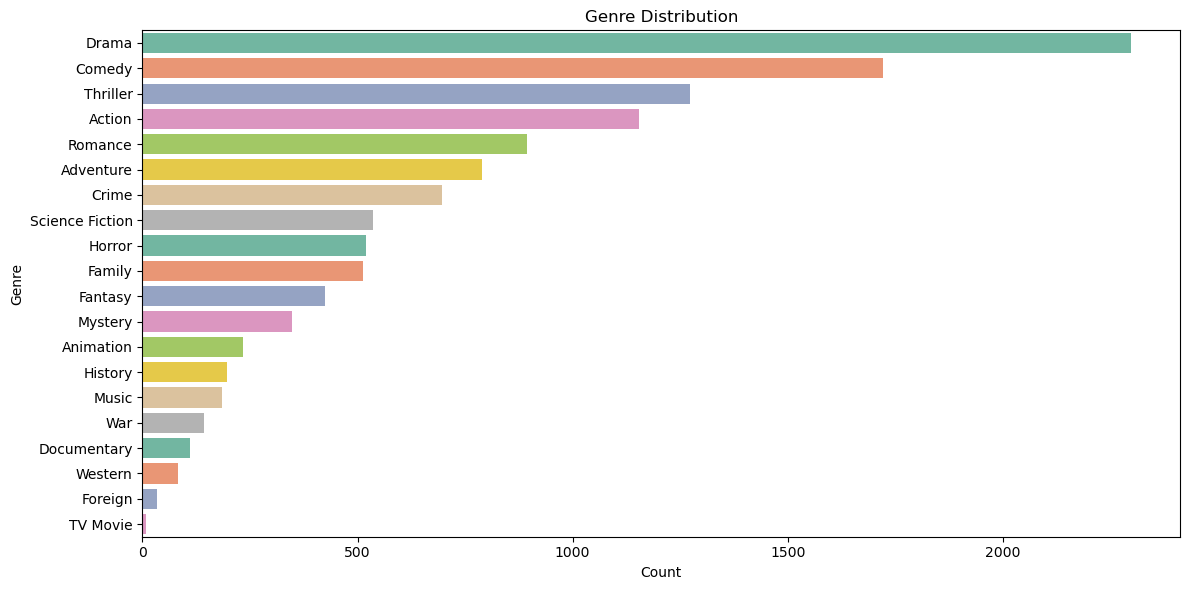

In [33]:
# Genre Distribution Plot
plt.figure(figsize=(12,6))
sns.countplot(y=all_genres, order=pd.Series(all_genres).value_counts().index, palette='Set2')
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [21]:
def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in indices:
        return "Movie not found"
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    movie_indices = [i[0] for i in sim_scores]
    
    results = movies.iloc[movie_indices][['title', 'genres', 'vote_average']]
    return results

In [22]:
import matplotlib.pyplot as plt

def show_rating_chart(df):
    plt.figure(figsize=(8, 5))
    plt.barh(df['title'], df['vote_average'], color='skyblue')
    plt.xlabel('Rating')
    plt.title('Top 5 Recommended Movies (by Rating)')
    plt.gca().invert_yaxis()
    plt.show()

In [23]:
def show_genre_pie(df):
    genres = df['genres'].str.split(', ').explode()
    genre_counts = genres.value_counts()
    
    plt.figure(figsize=(6, 6))
    plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title("Genre Distribution in Recommendations")
    plt.axis('equal')
    plt.show()

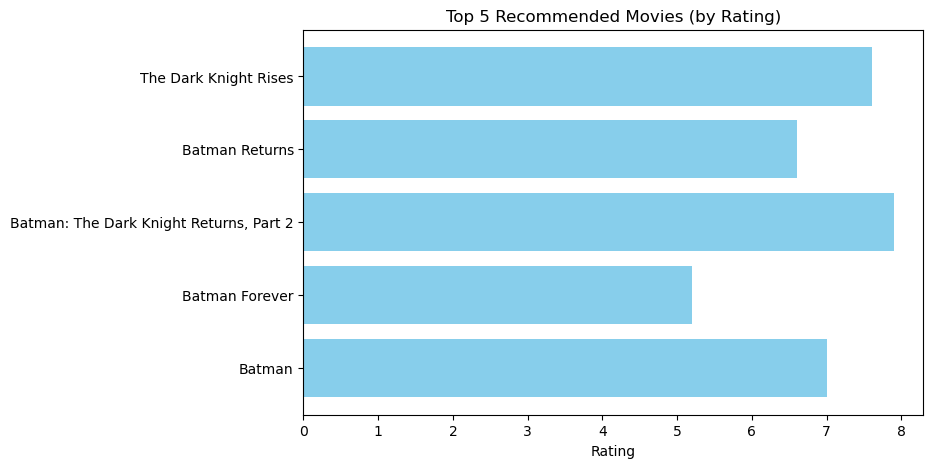

In [24]:
result = get_recommendations("The Dark Knight")
show_rating_chart(result)

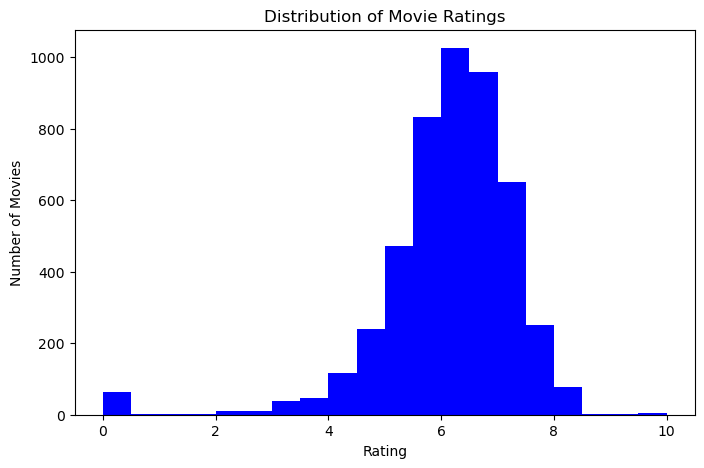

In [25]:
plt.figure(figsize=(8, 5))
plt.hist(movies['vote_average'], bins=20, color='blue')
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Ratings")
plt.show()

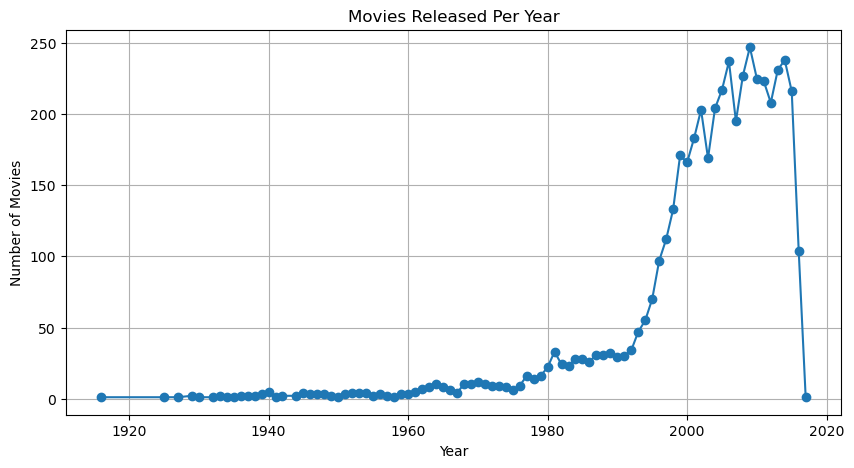

In [26]:
movies['release_year'] = pd.to_datetime(movies['release_date'], errors='coerce').dt.year
yearly_counts = movies['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Movies Released Per Year")
plt.grid(True)
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_7940\1276949329.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vote_average', y='title', data=top_movies, palette='Set1')


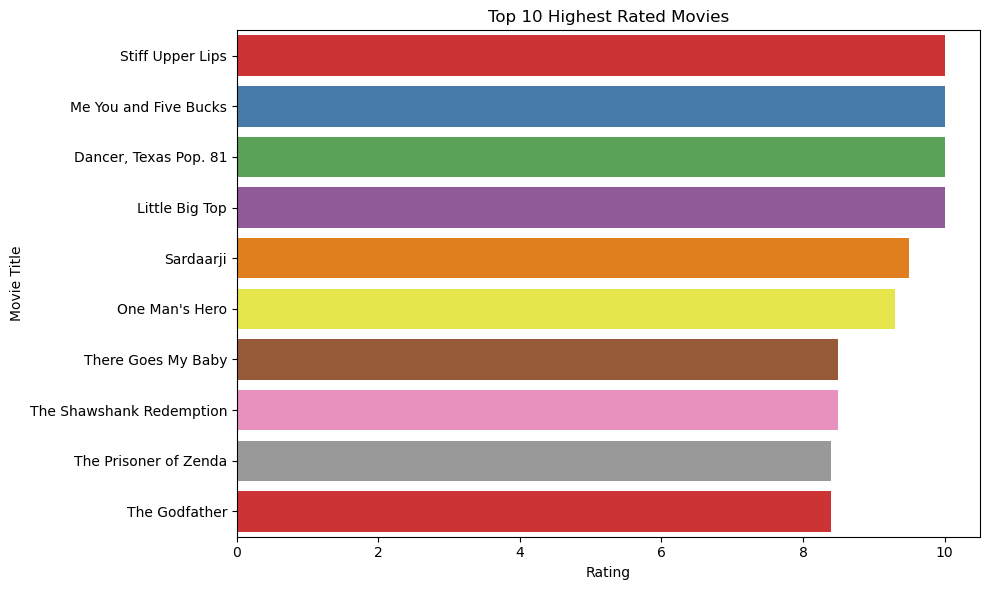

In [27]:
#  Top 10 Highest Rated Movies
top_movies = movies.sort_values(by='vote_average', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='vote_average', y='title', data=top_movies, palette='Set1')
plt.title('Top 10 Highest Rated Movies')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

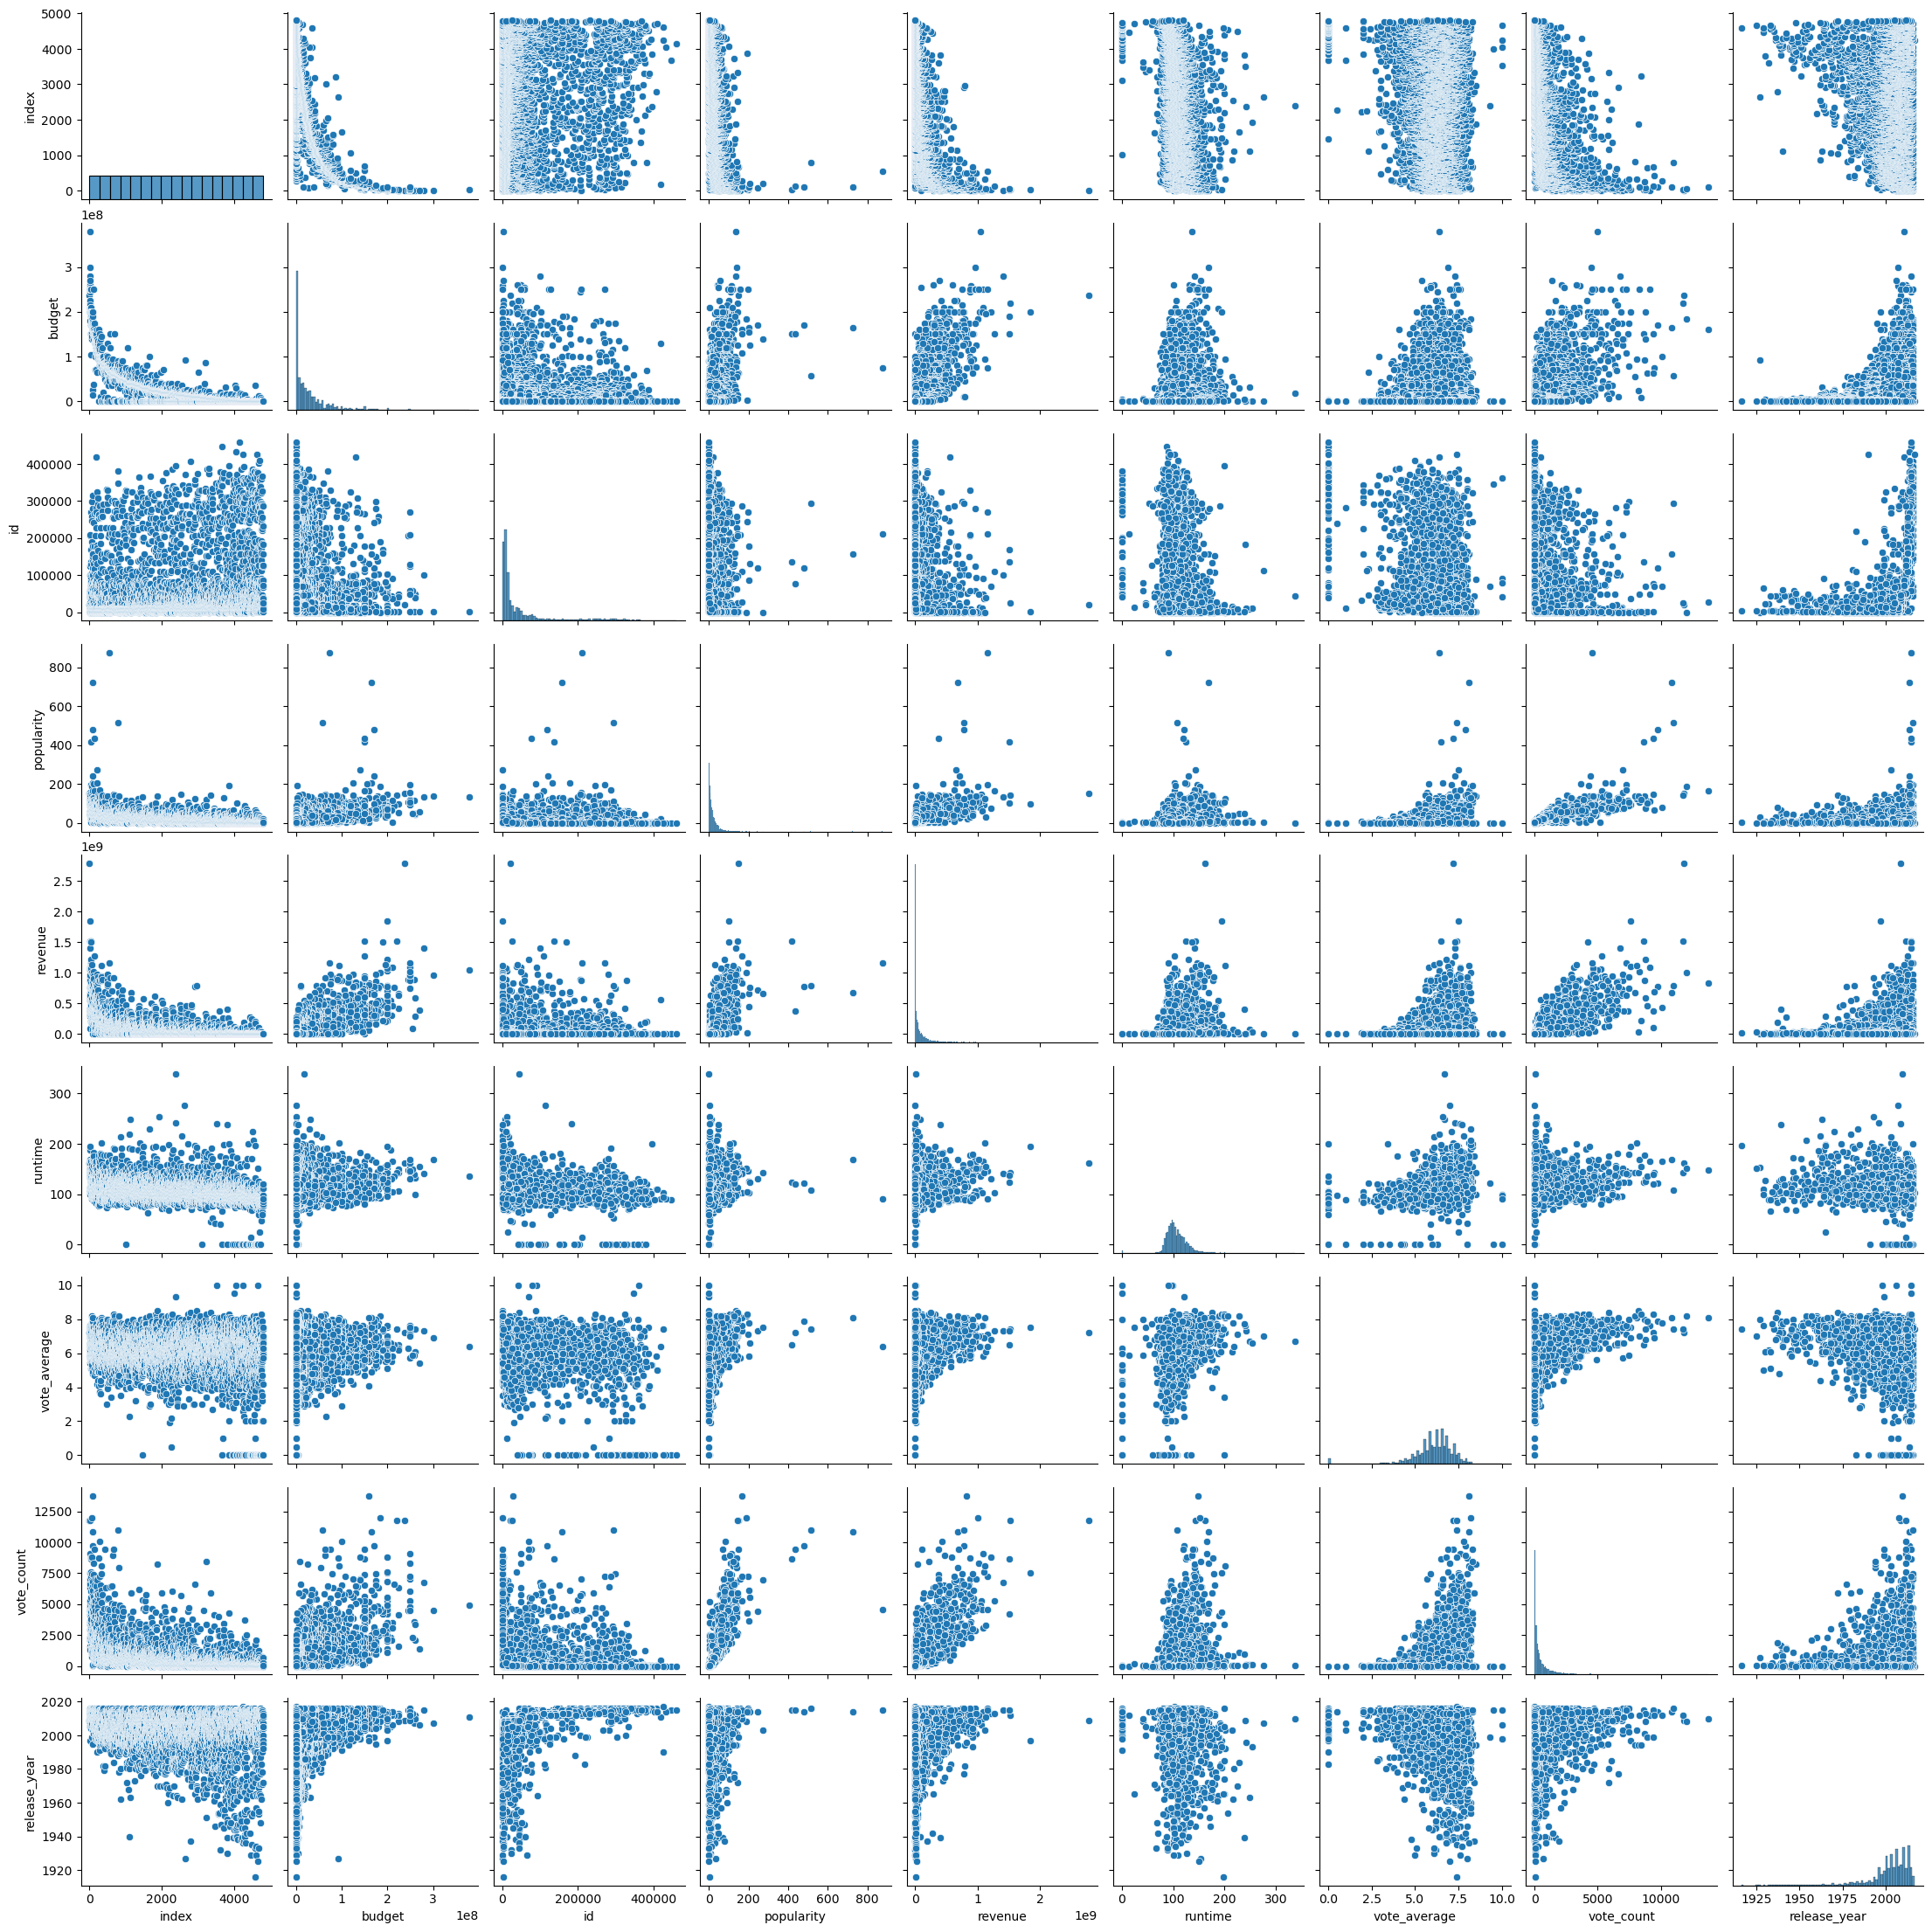

In [28]:
sns.pairplot(movies)
plt.show()

✅ Conclusion

This project successfully implemented a content-based recommendation engine that suggests movies similar
to a user-selected title by analyzing textual overviews and calculating cosine similarities.
The use of TF-IDF vectorization enabled meaningful extraction of features from unstructured text, while 
additional visualizations such as rating charts and genre distribution pies provided valuable insights 
into the recommended titles. Although effective, this model primarily focuses on content similarity and does
not incorporate user behavior or collaborative filtering.
Future enhancements could involve hybrid models that blend multiple recommendation strategies to 
improve accuracy and personalization. Overall, this capstone demonstrates a strong foundation
in machine learning, data visualization, and recommendation system design.